In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_csv(r"C:\Users\Sushant\Desktop\Datasets\diabetes_dataset.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [9]:
from imblearn.over_sampling import RandomOverSampler
ro=RandomOverSampler()
x_data,y_data=ro.fit_resample(x,y)

In [10]:
from collections import Counter
print("Actual data",Counter(y))
print("Artificial",Counter(y_data))

Actual data Counter({0: 500, 1: 268})
Artificial Counter({1: 500, 0: 500})


In [11]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=2,random_state=0,shuffle=True)
kf.get_n_splits(x_data)
print(kf)

KFold(n_splits=2, random_state=0, shuffle=True)


In [12]:
for train_index,test_index in kf.split(x_data):
    print("TRAIN:",train_index,"TEST:",test_index)
    x_train,x_test=x_data[train_index],x_data[test_index]
    y_train,y_test=y_data[train_index],y_data[test_index]

TRAIN: [  0   3   4   7   9  11  13  16  19  23  24  25  26  28  29  32  33  36
  41  42  43  44  47  53  56  57  58  59  61  63  67  69  70  72  73  74
  80  82  83  84  86  87  88  89  91  93  94  95  96  98  99 102 106 107
 110 111 112 114 115 117 119 120 121 123 126 128 129 130 131 132 134 135
 136 137 138 139 143 146 147 148 149 151 152 153 160 163 164 166 168 169
 173 174 176 177 180 182 183 184 185 189 191 192 194 195 197 199 201 203
 207 209 212 213 216 217 219 221 223 225 226 227 228 232 233 234 237 244
 246 248 254 256 257 259 260 265 269 273 274 275 276 277 280 281 282 284
 286 287 288 289 290 291 292 296 297 300 305 307 314 321 322 323 324 326
 327 328 329 335 336 339 340 341 343 347 348 349 353 355 357 359 360 365
 368 369 370 371 373 376 377 381 383 387 388 392 393 394 396 398 400 401
 404 405 407 410 411 414 417 419 421 423 426 428 429 430 431 433 437 438
 441 442 444 445 446 448 449 450 454 455 459 461 463 464 468 469 470 472
 473 475 476 480 486 488 490 498 499 502 504

[0.704 0.728]
71.6


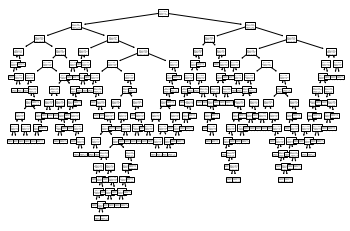

In [13]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier=classifier.fit(x_data,y_data)
tree.plot_tree(classifier)

from sklearn.model_selection import cross_val_score
scores=cross_val_score(classifier,x_train,y_train,cv=kf)
print(scores)
print(np.mean(scores)*100)

In [14]:
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(classifier,x_test,y_test,cv=kf)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,